In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
import random
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df=pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df.duplicated().sum()

418

<ipython-input-15-be97c4323058>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


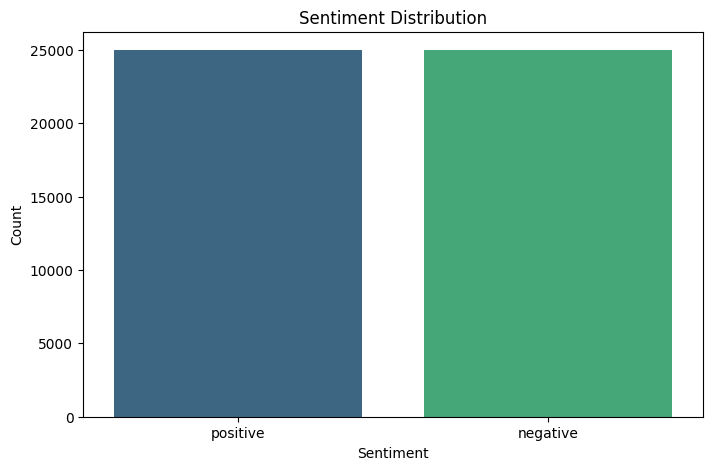

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Generate the word clouds for positive and negative reviews

positive_reviews = " ".join(df[df['sentiment'] == 'positive']['review'])
negative_reviews = " ".join(df[df['sentiment'] == 'negative']['review'])

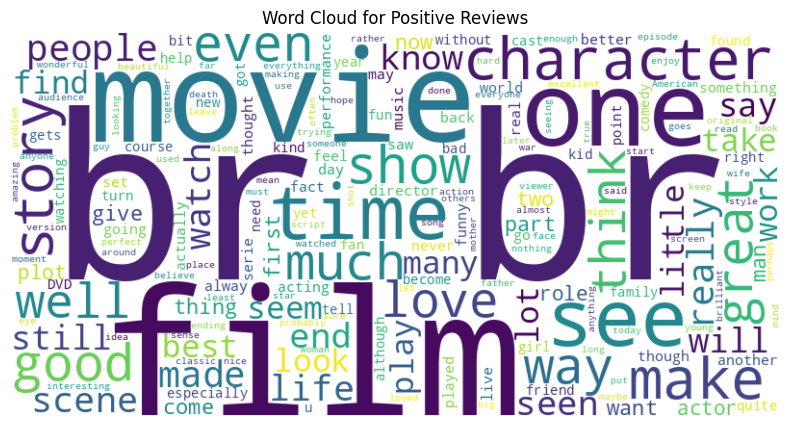

In [ ]:
# Positive Reviews by using Wordcloud

positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

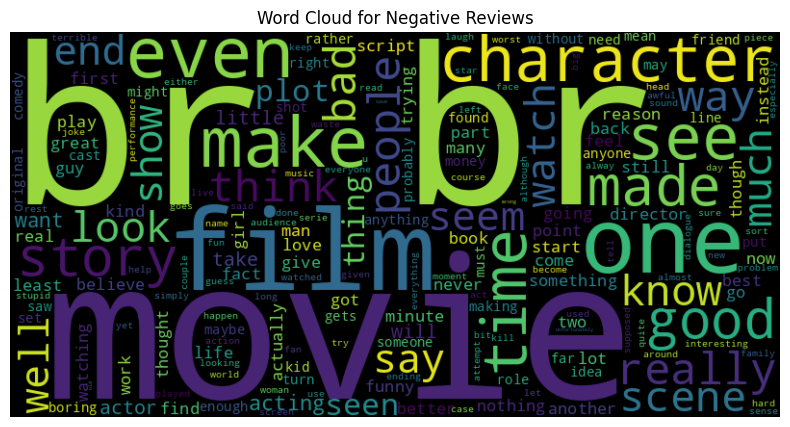

In [ ]:
# Negative Reviews by using Wordcloud

negative_wc = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [ ]:
# Convert a dataset Positive and negative into 1 and 0 integer form

df.sentiment = [1 if s == 'positive' else 0 for s in df.sentiment]
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


# **Text Preprocessing**

In [ ]:
# using stopwords from nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove HTML Strip and Special Characters
tag = random.randint(0, len(df)-1)
before_process = df.iloc[tag][0]

def process(a):
    a = re.sub('[,\.!?:()"]', '', a)
    a = re.sub('<.*?>', ' ', a)
    a = re.sub('http\S+', ' ', a)
    a = re.sub('[^a-zA-Z0-9]', ' ', a)
    a = re.sub('\s+', ' ', a)
    return a.lower().strip()

df['review'] = df['review'].apply(lambda a: process(a))
after_process = df.iloc[tag][0]

<ipython-input-21-a5b6be8a447d>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  before_process = df.iloc[tag][0]
<ipython-input-21-a5b6be8a447d>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  after_process = df.iloc[tag][0]


In [ ]:
nltk.download('punkt_tab')
def sw_remove(a):
    words = nltk.tokenize.word_tokenize(a)
    filtered_list = [word for word in words if word not in stop_words]
    return ' '.join(filtered_list)

df['review'] = df['review'].apply(lambda a: sw_remove(a))
after_removal = sw_remove(after_process)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
def stemmer(a):
  ps=nltk.porter.PorterStemmer()
  text= ' '.join([ps.stem(word) for word in a.split()])
  return text
df['review']=df['review'].apply(stemmer)

In [ ]:
df.head(5)

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


In [ ]:
Y_train=df['sentiment']
Y_test=df['sentiment']
Y_test

,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [ ]:
norm_train_reviews=df.review[:40000]
norm_train_reviews[0]
norm_test_reviews=df.review[40000:]
norm_test_reviews[45005]

'read review watch piec cinemat garbag took least 2 page find somebodi els think appallingli unfunni montag acm humour 70 inde era least funni set sketch comedi ever seen till come along half skit alreadi done infinit better act monti python woodi allen say nice piec anim last 90 second highlight film would still get close sum mindless drivel ridden wast 75 minut semin comedi world semin realli mean semen scatolog humour world scat actual fece precursor joke mean handbook comedi tit bum odd beaver niceif pubesc boy least one hand free found playboy exist give break earli 70 way sketch comedi go back least ten year prior way could even forgiv film even made gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 lower scoreand recommend insomniac coma patientsor perhap peopl suffer lockjawtheir jaw would final drop open disbelief'

In [ ]:
cv=CountVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews = cv.fit_transform(norm_train_reviews[:40000])  # Process only 40000 reviews
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

NameError: name 'CountVectorizer' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews = tv.fit_transform(norm_train_reviews[:40000])  # Process only 40000 reviews
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)

print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6605910)
Tfidf_test: (10000, 6605910)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
num_components = 800
lda = LDA(n_components=num_components)
# Apply LDA to training data
lda_train_features = lda.fit_transform(tv_train_reviews.toarray(), train_sentiment)
# Apply LDA to testing data
lda_test_features = lda.transform(tv_test_reviews.toarray())

In [ ]:
lb=LabelBinarizer()
sentimentdata=lb.fit_transform(df['sentiment'])
print(sentimentdata.shape)

In [ ]:
train_sentiment=sentimentdata[:40000]
test_sentiment=sentimentdata[40000:]
print(train_sentiment)
print(test_sentiment)

# **Using ML Algorithm such as Logistic Regression and Naive Bayes Algorithm**

In [ ]:
lr = LogisticRegression(penalty='l2', max_iter=1000, C=1, random_state=42)  # Increased max_iter
lr_bow = lr.fit(cv_train_reviews, train_sentiment)
lr_tfidf=lr.fit(tv_train_reviews,train_sentiment)

In [ ]:
print("Bag of Words :",lr_bow)
print("Tfidf :",lr_tfidf)

In [ ]:
# Bag of words Prediction
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
# Tfidf Prediction
lr_tfidf_predict=lr.predict(cv_test_reviews)
print(lr_tfidf_predict)

In [ ]:
# Bag of Words Accuracy
lr_bow_accuracy=accuracy_score(test_sentiment,lr_bow_predict)
print("Accuracy of BOW: ",lr_bow_accuracy)
# Tfidf Accuracy
lr_tfidf_accuracy=accuracy_score(test_sentiment,lr_tfidf_predict)
print("Accuracy of Tfidf: ",lr_tfidf_accuracy)

In [ ]:
# Classification Report of BOW
lr_bow_report=classification_report(test_sentiment,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)
# Classification Report of Tfidf
lr_tfidf_report=classification_report(test_sentiment,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

In [ ]:
# Confusion Matrix of BOW
bow_conf=confusion_matrix(test_sentiment,lr_bow_predict)
print("Confusion Matrix BOW: ",bow_conf)

# Confusion Matrix of Tfidf
tfidf_conf=confusion_matrix(test_sentiment,lr_tfidf_predict)
print("Confusion Matrix Tfidf: ",tfidf_conf)

In [ ]:
multinv=MultinomialNB()
# For BOW
multinv_bow=multinv.fit(cv_train_reviews,train_sentiment)
print(multinv_bow)
# For Tfidf
multinv_tfidf=multinv.fit(tv_train_reviews,train_sentiment)
print(multinv_tfidf)

In [ ]:
# Bag of words Prediction
multinv_bow_predict=multinv.predict(cv_test_reviews)
print(multinv_bow_predict)
# Tfidf Prediction
multinv_tfidf_predict=multinv.predict(cv_test_reviews)
print(multinv_tfidf_predict)

In [ ]:
# Bag of Words Accuracy
multinv_bow_accuracy=accuracy_score(test_sentiment,multinv_bow_predict)
print("Accuracy of BOW: ",multinv_bow_accuracy)
# Tfidf Accuracy
multinv_tfidf_accuracy=accuracy_score(test_sentiment,multinv_tfidf_predict)
print("Accuracy of Tfidf: ",multinv_tfidf_accuracy)

In [ ]:
# Classification Report of BOW
multinv_bow_report=classification_report(test_sentiment,multinv_bow_predict,target_names=['Positive','Negative'])
print(multinv_bow_report)
# Classification Report of Tfidf
multinv_tfidf_report=classification_report(test_sentiment,multinv_tfidf_predict,target_names=['Positive','Negative'])
print(multinv_tfidf_report)

In [ ]:
# Confusion Matrix of BOW
bow_conf=confusion_matrix(test_sentiment,multinv_bow_predict)
print("Confusion Matrix BOW: ",bow_conf)

# Confusion Matrix of Tfidf
tfidf_conf=confusion_matrix(test_sentiment,multinv_tfidf_predict)
print("Confusion Matrix Tfidf: ",tfidf_conf)

# **Using Deep Learning LSTM Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["review"], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Text Vectorizer
max_words=10000
max_len=150

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
# Build the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# Train the model
model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2)

In [ ]:
# Evaluate the model
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

In [ ]:
# Classification report
print("LSTM Classifier Results:")
print(classification_report(y_test, y_pred))

In [ ]:
# Calculate F1 Score and Accuracy
f1_lstm = f1_score(y_test, y_pred)
accuracy_lstm = accuracy_score(y_test, y_pred)
print(f"LSTM F1 Score: {f1_lstm}")
print(f"LSTM Accuracy: {accuracy_lstm}")